# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [180]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt

In [17]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [18]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [21]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [69]:
# Extract all rows of data
## source [2]
table = soup.find("table")
#print(table)



### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [106]:
print(headers[1].text)

terrestrial_date


In [165]:
# Create an empty list
## Empty list is to organize row data into

# Loop through the scraped data to create a list of rows
headers = table.find_all("th")
column_headers = [_.text for _ in headers]
print(column_headers)

# I think I need to dynamically write to dictionary. Dynamic by [i] index of the key name.
# reset i to 0 after each run of the nested loop:

rows = table.find_all("tr")
# now need to do nested loop to get all td items:

mars_list = []
for row in rows:
    i = 0
    row_data = row.find_all("td")
    for d in row_data:
        temp_data = {column_headers[i]: d.text}
        i += 1
        mars_list.append(temp_data)

print(mars_list[0:15])


### Combine list of dictionaries by key value using list and dict comprehension:
    #source [3]
    
output = {
    k: [d[k] for d in mars_list if k in d]
    for k in set().union(*mars_list)
}

# print(output)

['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']
[{'id': '2'}, {'terrestrial_date': '2012-08-16'}, {'sol': '10'}, {'ls': '155'}, {'month': '6'}, {'min_temp': '-75.0'}, {'pressure': '739.0'}, {'id': '13'}, {'terrestrial_date': '2012-08-17'}, {'sol': '11'}, {'ls': '156'}, {'month': '6'}, {'min_temp': '-76.0'}, {'pressure': '740.0'}, {'id': '24'}]


In [163]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_df = pd.DataFrame(output).loc[:, ["id", "terrestrial_date", "sol", "ls", "month", "min_temp", "pressure"]]

mars_df


,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [168]:
# Examine data type of each column
mars_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [179]:
# Change data types for data analysis
mars_df["terrestrial_date"] = mars_df["terrestrial_date"].astype('datetime64')
mars_df[["sol", "ls", "month"]] = mars_df[["sol", "ls", "month"]].astype('int64')
mars_df[["min_temp", "pressure"]] = mars_df[["min_temp", "pressure"]].astype('float64')

# Confirm type changes were successful by examining data types again
mars_df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [214]:
# 1. How many months are there on Mars?
print(mars_df.columns)

months = mars_df.groupby(['month'])['terrestrial_date'].count()
print(months)

Index(['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure'], dtype='object')
month
1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: terrestrial_date, dtype: int64


In [218]:
# 2. How many Martian days' worth of data are there?
days = months.sum()
days

1867

In [220]:
# 3. What is the average low temperature by month?
avg_mintemp = mars_df.groupby(['month'])['min_temp'].mean()
print(avg_mintemp)

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


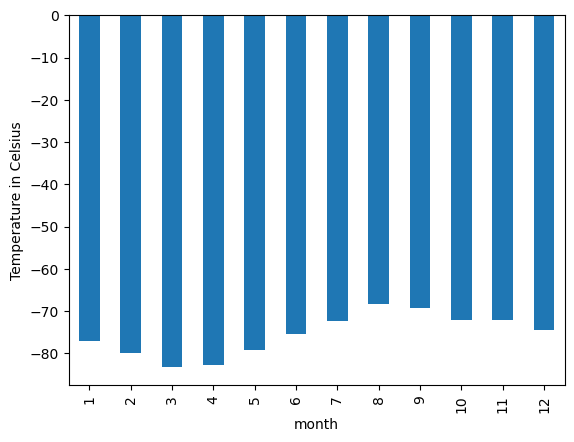

In [235]:
# Plot the average temperature by month
ax = avg_mintemp.plot.bar(use_index= True)
ax.set_xlabel("month")
ax.set_ylabel("Temperature in Celsius")
plt.show()

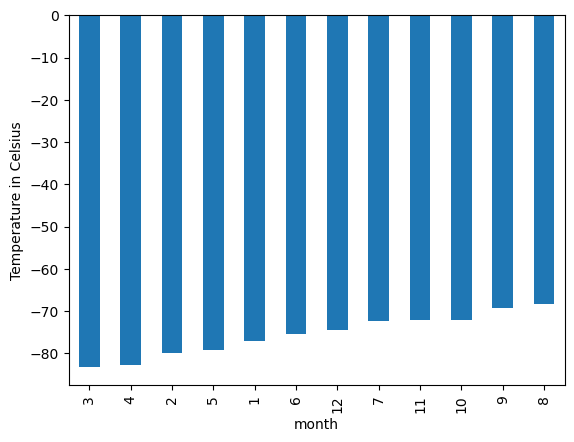

In [234]:
# Identify the coldest and hottest months in Curiosity's location
ax = avg_mintemp.sort_values().plot.bar(use_index= True)
ax.set_xlabel("month")
ax.set_ylabel("Temperature in Celsius")
plt.show()

In [237]:
# 4. Average pressure by Martian month
pressures = mars_df.groupby(['month'])['pressure'].mean()
pressures

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

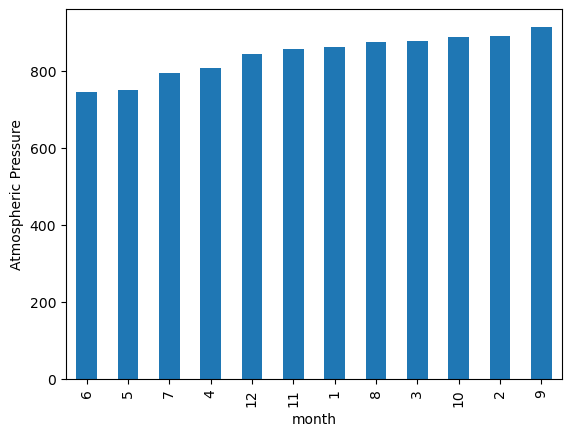

In [239]:
# Plot the average pressure by month
ax = pressures.sort_values().plot.bar(use_index= True)
ax.set_xlabel("month")
ax.set_ylabel("Atmospheric Pressure")
plt.show()

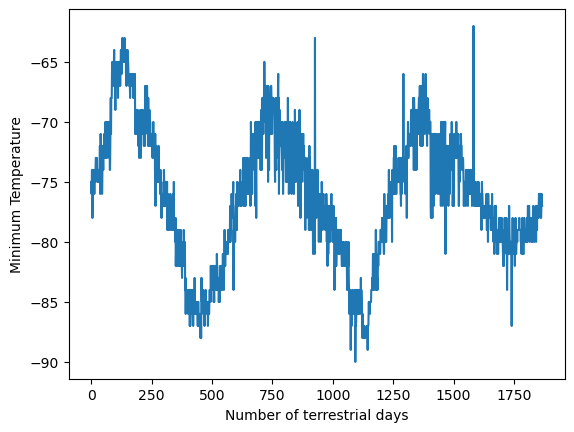

In [258]:
# 5. How many terrestrial (earth) days are there in a Martian year?
earth_days = mars_df['min_temp']

ax = earth_days.plot(use_index= True)
ax.set_xlabel("Number of terrestrial days")
ax.set_ylabel("Minimum Temperature")
plt.show()

## Part 2 Answers:

**How many months exist on Mars?**
- There are 12 months on mars.

**How many Martian (and not Earth) days worth of data exist in the scraped dataset?**
- 1867 days

**What are the coldest and the warmest months on Mars (at the location of Curiosity)?**
- The coldest month is month 3 at less than -80 Celsius. 
- The warmest month is month 8 at around -68 Celsius.

**Which months have the lowest and the highest atmospheric pressure on Mars?**
- The month with lowest atmospheric pressure on average is month 6.
- The month with highest atmospheric pressure on average is month 9.


**About how many terrestrial (Earth) days exist in a Martian year?**
- There are about 700 days in a Martian year. This was estimated based on the length of a single cycle of temperature changes over visualized over the 1867 Martian days in the data set.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [260]:
# Write the data to a CSV
mars_df.to_csv('mars_data.csv')

In [164]:
browser.quit()